# Assignment Overview


## Background Story  

ABC Insurance, once a market leader, has been noticing a worrying trend in its customer base – a gradual but steady increase in customer churn, alongside a static, sometimes faltering, customer lifetime value. The CEO, in a recent town hall, made it clear: "Our customers are the lifeblood of our business. Understanding them isn't just part of the job — it is the job."

Your task comes directly from the top: The CEO, in collaboration with the head of the marketing department, has formally requested a comprehensive analysis to unearth the hidden patterns within the customer data. They believe that the data holds the key to revitalizing ABC Insurance's customer engagement strategy, tailoring product offerings to individual needs, and ultimately turning the tide on churn.

## Data Description

The IT extracted three tables that contains the available information asked by the Head of Marketing: ABC_df_costumer, ABC_df_demographics, ABC_df_termination. 

Please download the data from: https://novasbe365-my.sharepoint.com/:f:/g/personal/nuno_silva_novasbe_pt/Ekl41SdwtkVOiW52LsaEy5QBo1mjQXHZKwKMeNSJRbEu3g?e=tgkSYD 

### Dataframes details 

#### df_customer:

Contains details about the customers, including their ID, address, policy start dates, and the current annual amounts for car, health, and house insurance.

##### Variables
INDIVIDUAL_ID: Unique identifier for the customer.

ADDRESS_ID: Address identifier for the customer.

CUST_ORIG_DATE: The original date when the customer joined.

DATE_OF_BIRTH: Customer's date of birth.

SOCIAL_SECURITY_NUMBER: Customer's SSN (for identification).

CUST_START_DATE: The start date of the customer's current policy.

CURR_ANN_AMT_CAR: Current annual amount paid for car insurance.

CURR_ANN_AMT_HEALTH: Current annual amount paid for health insurance.

CURR_ANN_AMT_HOUSE: Current annual amount paid for house insurance.


#### df_demographics:
Includes demographic information about the customers, such as income, family status, home ownership, and credit rating.

##### Variables

INDIVIDUAL_ID: Unique identifier for the customer (links to df_customer).

INCOME: Customer's income.

HAS_CHILDREN: Indicates if the customer has children.

LENGTH_OF_RESIDENCE: How long the customer has lived in their current residence.

MARITAL_STATUS: Customer's marital status.

HOME_MARKET_VALUE: Market value of the customer's home.

HOME_OWNER: Indicates if the customer owns their home.

COLLEGE_DEGREE: Indicates if the customer has a college degree.

GOOD_CREDIT: Indicates if the customer has good credit.

ADVANCED_STUDIES: Indicates if the customer has pursued advanced studies.


#### df_termination:

Lists customers who have suspended their policies, including the suspension date.

##### Variables

INDIVIDUAL_ID: Unique identifier for the customer (links to df_customer).

SUSPD_DATE: The date when the customer's policy was suspended.

## Question 1: Data Quality and Customer Understanding (30 points)

#### Background: Before delving into sophisticated analyses and model building, ensuring the integrity and quality of data is paramount. The provided datasets are critical for understanding ABC Insurance's clientele but may contain issues affecting their utility for further analysis.

#### Q1.1 Please perform the exploratory data analysis of the data. (20 points)

What specific metrics and techniques did you use to assess the quality of the data in each dataset? Describe the issues you identified in the datasets. For each issue, detail the impact it could have on analysis and decision-making processes. After cleaning, how did the data quality improve? Present metrics or observations to demonstrate the improvement in data quality.

In [129]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [130]:
df_customers = pd.read_csv("/Users/manuelpantaleo/Desktop/Machine Learning/Assignment/ABC_df_customer.csv")
df_demographics = pd.read_csv("/Users/manuelpantaleo/Desktop/Machine Learning/Assignment/ABC_df_demographic.csv")
df_termination = pd.read_csv("/Users/manuelpantaleo/Desktop/Machine Learning/Assignment/ABC_df_termination.csv")


/var/folders/26/7sr8s37n6nb5g99wv7xjv12r0000gn/T/ipykernel_6722/538016971.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_customers = pd.read_csv("/Users/manuelpantaleo/Desktop/Machine Learning/Assignment/ABC_df_customer.csv")


In [131]:
print(df_customers.shape)
print(df_demographics.shape)
print(df_termination.shape)

(2303124, 10)
(2112579, 11)
(269259, 3)


In [132]:
#Check NaN
df_customers.isna().sum()

Unnamed: 0                    0
INDIVIDUAL_ID                 1
ADDRESS_ID                    1
CUST_ORIG_DATE                0
DATE_OF_BIRTH                 0
SOCIAL_SECURITY_NUMBER        0
CUST_START_DATE           91213
CURR_ANN_AMT_CAR              0
CURR_ANN_AMT_HEALTH           0
CURR_ANN_AMT_HOUSE            0
dtype: int64

In [133]:
#Check for duplicates
Id_count_df = df_customers['INDIVIDUAL_ID'].nunique()
Id_count_df

2280320

In [134]:
# Count how many times each INDIVIDUAL_ID appears in the dataset
individual_id_counts = df_customers['INDIVIDUAL_ID'].value_counts()

# Find INDIVIDUAL_IDs that appear more than once (duplicates)
duplicates_2 = individual_id_counts[(individual_id_counts > 1) & (individual_id_counts <= 2)].count()
duplicates_3 = individual_id_counts[individual_id_counts > 2].count()

print(f"Number of duplicates appearing more than once: {duplicates_2}")
print(f"Number of duplicates appearing more than twice: {duplicates_3}")

Number of duplicates appearing more than once: 22803
Number of duplicates appearing more than twice: 0


In [135]:
#Now we can remove duplicates
df_customers.drop_duplicates(subset='INDIVIDUAL_ID', keep="last", inplace=True)

In [136]:
df_customers.isna().sum()

Unnamed: 0                    0
INDIVIDUAL_ID                 1
ADDRESS_ID                    1
CUST_ORIG_DATE                0
DATE_OF_BIRTH                 0
SOCIAL_SECURITY_NUMBER        0
CUST_START_DATE           68410
CURR_ANN_AMT_CAR              0
CURR_ANN_AMT_HEALTH           0
CURR_ANN_AMT_HOUSE            0
dtype: int64

In [137]:
#Now let's drop the missing value in INDIVIDUAL_ID
df_customers.dropna(axis=0, subset=['INDIVIDUAL_ID'], inplace=True)

In [138]:
# Convert column types
date_columns = ['CUST_ORIG_DATE', 'DATE_OF_BIRTH', 'CUST_START_DATE']
for col in date_columns:
    df_customers[col] = pd.to_datetime(df_customers[col], errors='coerce')

df_customers['INDIVIDUAL_ID'] = df_customers['INDIVIDUAL_ID'].astype('int64')

In [139]:
# Now let's compare CUST_ORIG_DATE with CUST_START_DATE
df_customers['Orig_equals_Start'] = df_customers['CUST_ORIG_DATE'] == df_customers['CUST_START_DATE']
not_equal_count = (df_customers["Orig_equals_Start"] == False).sum()
equal_count = (df_customers["Orig_equals_Start"] == True).sum()
missing_values_percentage = (df_customers["CUST_START_DATE"].isna().sum()) / len(df_customers)

future_dates = len(df_customers[df_customers["CUST_START_DATE"]>"2024-01-01"])

equal_percentage = equal_count / len(df_customers)
not_equal_percentage = not_equal_count / len(df_customers)

print(f"Given that the percentage of dates equal in both columns is: {equal_percentage},\n"
      f"the percentage of dates not equal in both columns is: {not_equal_percentage},\n"
      f"the percentage of missing values in CUST_START_DATE column is: {missing_values_percentage} and\n"
      f"there are {not_equal_count} future dates, I will drop the entire column and assume that all the customers\n"
      f"started their policy when they joined the company.")

Given that the percentage of dates equal in both columns is: 0.9017594021891664,
the percentage of dates not equal in both columns is: 0.09824059781083357,
the percentage of missing values in CUST_START_DATE column is: 0.030000175413976985 and
there are 224020 future dates, I will drop the entire column and assume that all the customers
started their policy when they joined the company.


In [140]:
df_customers.drop(columns=["CUST_START_DATE", "Orig_equals_Start", "Unnamed: 0"], inplace=True)

In [141]:
df_customers.dropna(axis=0, inplace=True)

In [142]:
df_customers.isna().sum()

INDIVIDUAL_ID             0
ADDRESS_ID                0
CUST_ORIG_DATE            0
DATE_OF_BIRTH             0
SOCIAL_SECURITY_NUMBER    0
CURR_ANN_AMT_CAR          0
CURR_ANN_AMT_HEALTH       0
CURR_ANN_AMT_HOUSE        0
dtype: int64

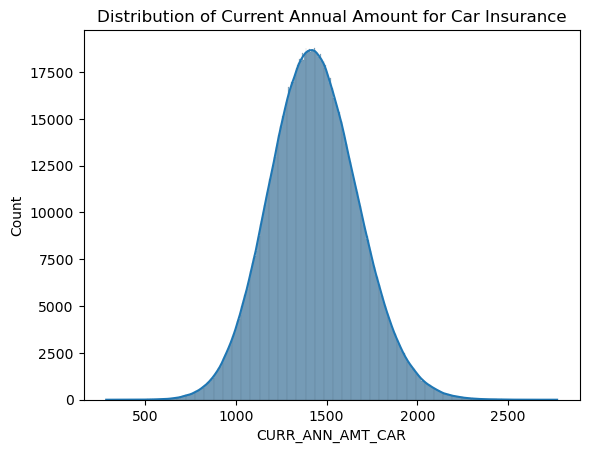

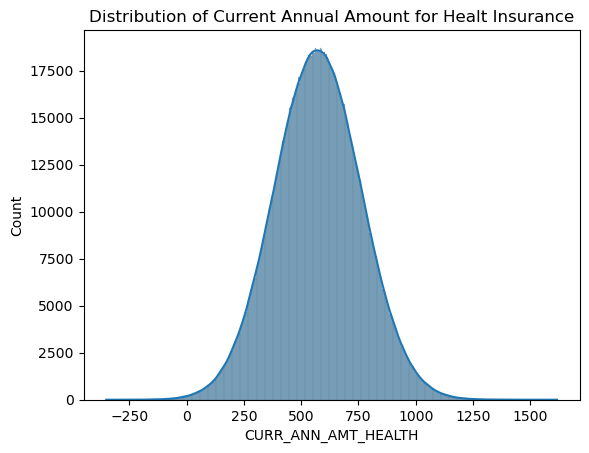

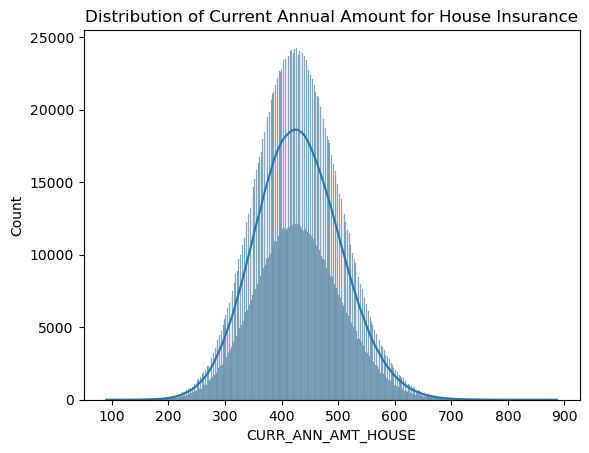

In [143]:
# check distribution of these variables 
sns.histplot(df_customers['CURR_ANN_AMT_CAR'], kde=True)
plt.title('Distribution of Current Annual Amount for Car Insurance')
plt.show()

sns.histplot(df_customers['CURR_ANN_AMT_HEALTH'], kde=True)
plt.title('Distribution of Current Annual Amount for Healt Insurance')
plt.show()

sns.histplot(df_customers['CURR_ANN_AMT_HOUSE'], kde=True)
plt.title('Distribution of Current Annual Amount for House Insurance')
plt.show()

In [144]:
#dropping negative values of CURR_ANN_AMT_HEALTH
df_customers = df_customers[df_customers['CURR_ANN_AMT_HEALTH'] >= 0]

In [145]:
#Now I will create a column with the age of each customers as it may be a useful feature for bulding a baseline model
current_date = datetime.today()
df_customers['Age'] = (current_date - df_customers['DATE_OF_BIRTH']).dt.days // 365

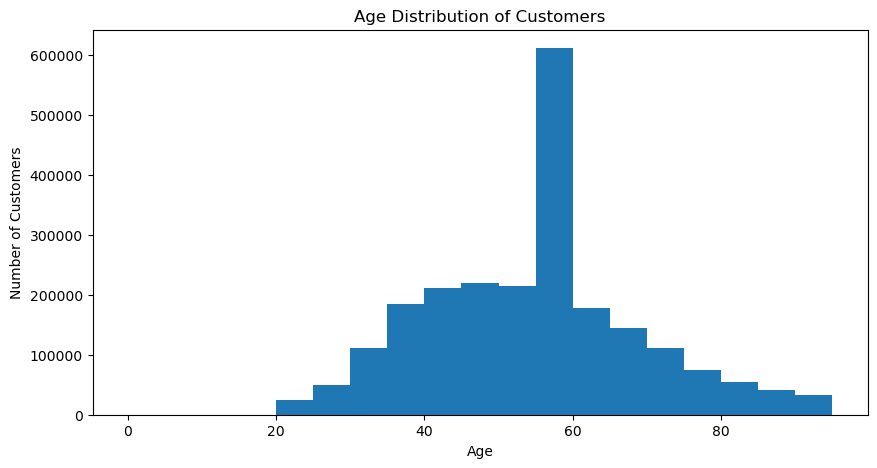

In [146]:
#plot age
plt.figure(figsize=(10, 5))
df_customers['Age'].hist(bins=range(0, 100, 5))
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.grid(False)
plt.show()

Now let's clean the other dataset

In [147]:
print(df_demographics.isna().sum())

Unnamed: 0                  0
INDIVIDUAL_ID               0
INCOME                      0
HAS_CHILDREN                0
LENGTH_OF_RESIDENCE         0
MARITAL_STATUS         431648
HOME_MARKET_VALUE      190205
HOME_OWNER                  0
COLLEGE_DEGREE              0
GOOD_CREDIT                 0
ADVANCED_STUDIES            0
dtype: int64


Now I will fill the NaN values of the column 'MARITAL_STATUS' with "Not Given" assuming that those customers didn't want to express their status.

In [148]:
df_demographics['MARITAL_STATUS'].fillna('Not Given', inplace=True)

In [149]:
df_demographics.isna().sum()

Unnamed: 0                  0
INDIVIDUAL_ID               0
INCOME                      0
HAS_CHILDREN                0
LENGTH_OF_RESIDENCE         0
MARITAL_STATUS              0
HOME_MARKET_VALUE      190205
HOME_OWNER                  0
COLLEGE_DEGREE              0
GOOD_CREDIT                 0
ADVANCED_STUDIES            0
dtype: int64

In [150]:
# Replace "1000000 Plus" with 1000000
df_demographics['HOME_MARKET_VALUE'] = df_demographics['HOME_MARKET_VALUE'].replace('1000000 Plus', '1000000')

# Split range values into two separate columns and convert to integers
df_demographics[['Start_Value', 'End_Value']] = df_demographics['HOME_MARKET_VALUE'].str.split(' - ', expand=True).astype(float)

# Calculate the average for two numbers, convert NaN to 0, and keep only 1000000
df_demographics['HOME_MARKET_VALUE_'] = df_demographics.apply(lambda row: (row['Start_Value'] + row['End_Value']) / 2 if pd.notnull(row['Start_Value']) 
                                            and pd.notnull(row['End_Value']) else 0 if pd.isnull(row['Start_Value']) else 1000000, axis=1)

# Drop unnecessary columns
df_demographics.drop(columns=['Start_Value', 'End_Value', 'HOME_MARKET_VALUE',"Unnamed: 0"], inplace=True)

df_demographics

,INDIVIDUAL_ID,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,MARITAL_STATUS,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES,HOME_MARKET_VALUE_
0,2.213028e+11,187500.000,1.0,8.0,Single,1,1,1,Y,324999.5
1,2.213032e+11,63750.000,0.0,0.0,Single,0,0,0,N,0.0
2,2.213032e+11,41250.000,0.0,15.0,Married,1,0,1,N,87499.5
3,2.213032e+11,120558.264,0.0,0.0,Not Given,1,0,0,N,12999.5
4,2.213032e+11,187500.000,0.0,0.0,Not Given,0,0,1,Y,0.0
...,...,...,...,...,...,...,...,...,...,...
2112574,2.213006e+11,131250.000,1.0,12.0,Married,1,0,1,N,62499.5
2112575,2.213006e+11,56250.000,1.0,5.0,Single,0,0,1,N,62499.5
2112576,2.213006e+11,187500.000,0.0,13.0,Married,1,1,1,N,237499.5
2112577,2.213006e+11,187500.000,2.0,12.0,Married,1,0,1,Y,112499.5


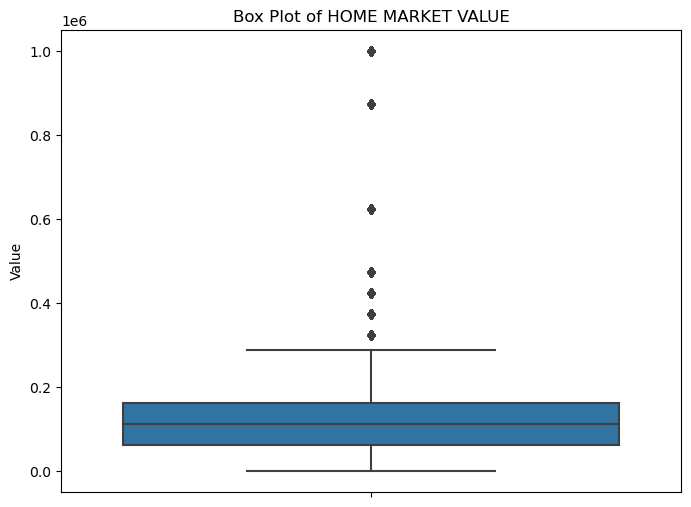

In [151]:
# Plotting the box plot for 'HOME_MARKET_VALUE_'
plt.figure(figsize=(8, 6))
sns.boxplot(y='HOME_MARKET_VALUE_', data=df_demographics)
plt.title('Box Plot of HOME MARKET VALUE')
plt.ylabel('Value')
plt.show()

In [152]:
# For the column 'MARITAL_STATUS' we will do one hot encoding
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform the 'MARITAL_STATUS' column
encoded_marital_status = encoder.fit_transform(df_demographics[['MARITAL_STATUS']])

# Get feature names from the encoder
feature_names = encoder.get_feature_names_out(['MARITAL_STATUS'])

# Create a DataFrame with the encoded variables
encoded_marital_status_df = pd.DataFrame(encoded_marital_status, columns=feature_names)

# Join the new encoded variables back to the original DataFrame
df_demographics = df_demographics.join(encoded_marital_status_df)

# Drop the original 'MARITAL_STATUS' column as it's now encoded
df_demographics = df_demographics.drop('MARITAL_STATUS', axis=1)

/Users/manuelpantaleo/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [153]:
#Check for negative values in LENGTH_OF_RESIDENCE
negative_values = df_demographics[df_demographics['LENGTH_OF_RESIDENCE'] < 0]
count_negative_values = negative_values.shape[0]

print("\nCount of negative values:", count_negative_values)


Count of negative values: 0


In [154]:
# Encode ADVANCED_STUDIES with double encoding
encoder = OrdinalEncoder()
encoded_values = encoder.fit_transform(df_demographics[['ADVANCED_STUDIES']])

# Update the DataFrame with the encoded values
df_demographics['ADVANCED_STUDIES'] = encoded_values

Now let's analyse df_termination

In [155]:
df_termination.isna().sum()

Unnamed: 0          0
INDIVIDUAL_ID       0
SUSPD_DATE       2693
dtype: int64

In [156]:
# Calculate the number of days from the reference date (today) until the suspension date
# Ensure SUSPD_DATE is a datetime Series
df_termination['SUSPD_DATE'] = pd.to_datetime(df_termination['SUSPD_DATE'])

# Use pd.Timestamp for datetime.now() to ensure compatibility with pandas datetime operations
now = pd.Timestamp(datetime.now())

df_termination['DAYS_TO_CHURN'] = (df_termination['SUSPD_DATE'] - now).dt.days

# Create a churn indicator where the policy suspension date has passed
df_termination['CHURN_INDICATOR'] = df_termination['SUSPD_DATE'].apply(lambda x: 1 if pd.isnull(x) or x < now else 0)

print(df_termination.head())

   Unnamed: 0  INDIVIDUAL_ID SUSPD_DATE  DAYS_TO_CHURN  CHURN_INDICATOR
0           0   2.213026e+11 2022-10-09         -509.0                1
1           1   2.213028e+11 2022-04-24         -677.0                1
2           2   2.213027e+11 2022-05-21         -650.0                1
3           3   2.213002e+11 2022-04-27         -674.0                1
4           4   2.213026e+11 2022-09-16         -532.0                1


In [157]:
df_merged = pd.merge(df_customers, df_demographics, on="INDIVIDUAL_ID", how='inner')
df = pd.merge(df_merged, df_termination, on="INDIVIDUAL_ID", how='left')


In [158]:
df.isna().sum()

INDIVIDUAL_ID                     0
ADDRESS_ID                        0
CUST_ORIG_DATE                    0
DATE_OF_BIRTH                     0
SOCIAL_SECURITY_NUMBER            0
CURR_ANN_AMT_CAR                  0
CURR_ANN_AMT_HEALTH               0
CURR_ANN_AMT_HOUSE                0
Age                               0
INCOME                            0
HAS_CHILDREN                      0
LENGTH_OF_RESIDENCE               0
HOME_OWNER                        0
COLLEGE_DEGREE                    0
GOOD_CREDIT                       0
ADVANCED_STUDIES                  0
HOME_MARKET_VALUE_                0
MARITAL_STATUS_Married            0
MARITAL_STATUS_Not Given          0
MARITAL_STATUS_Single             0
Unnamed: 0                  1861066
SUSPD_DATE                  1863576
DAYS_TO_CHURN               1863576
CHURN_INDICATOR             1861066
dtype: int64

In [159]:
#Drop unecessary column
df.drop(axis=1, columns=["Unnamed: 0"],inplace=True)

In [160]:
df_filtered = df[df['SUSPD_DATE'] <= df['CUST_ORIG_DATE']]
df_filtered

,INDIVIDUAL_ID,ADDRESS_ID,CUST_ORIG_DATE,DATE_OF_BIRTH,SOCIAL_SECURITY_NUMBER,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE,Age,INCOME,...,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES,HOME_MARKET_VALUE_,MARITAL_STATUS_Married,MARITAL_STATUS_Not Given,MARITAL_STATUS_Single,SUSPD_DATE,DAYS_TO_CHURN,CHURN_INDICATOR
3,221301573419,5.213006e+11,2022-07-25,1969-05-25,775-XX-6249,1492.409561,401.517490,463,54,187500.000,...,0,1,0.0,187499.5,1.0,0.0,0.0,2021-12-22,-800.0,1.0
16,221300941052,5.213003e+11,2022-09-13,1967-07-07,563-XX-7554,1461.044351,549.459265,457,56,71250.000,...,0,1,0.0,0.0,0.0,1.0,0.0,2022-06-12,-628.0,1.0
37,221301284371,5.213005e+11,2022-03-20,1969-11-25,938-XX-8849,1250.160284,623.893692,394,54,33750.000,...,0,0,0.0,62499.5,0.0,0.0,1.0,2022-03-12,-720.0,1.0
97,221302175193,5.213008e+11,2022-06-24,1967-07-07,602-XX-6030,1556.097264,835.069481,482,56,131250.000,...,0,1,0.0,87499.5,1.0,0.0,0.0,2022-01-28,-763.0,1.0
102,221300253757,5.213001e+11,2022-09-29,1987-07-23,188-XX-9778,1767.658558,825.287955,560,36,71250.000,...,0,1,0.0,87499.5,1.0,0.0,0.0,2022-01-15,-776.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2109906,221301904712,5.213007e+11,2022-09-10,1982-05-22,210-XX-6905,1439.547652,904.512039,446,41,26250.000,...,0,1,0.0,112499.5,0.0,0.0,1.0,2022-04-01,-700.0,1.0
2109954,221302477433,5.213009e+11,2022-08-10,1989-06-20,705-XX-2197,1651.802173,716.202419,523,34,56250.000,...,1,1,0.0,137499.5,0.0,0.0,1.0,2022-02-27,-733.0,1.0
2109963,221300625591,5.213002e+11,2022-05-09,1976-08-24,225-XX-1893,1341.391628,771.850491,422,47,18750.000,...,0,0,0.0,162499.5,0.0,0.0,1.0,2021-12-23,-799.0,1.0
2109979,221302815522,5.213010e+11,2022-08-31,1979-08-24,428-XX-4723,1227.930573,516.607034,330,44,120558.264,...,0,1,1.0,87499.5,0.0,0.0,1.0,2022-02-02,-758.0,1.0


Since there are suspension dates that come earlier or are equal than the origin date I will keep only those that are greater.

In [161]:
# Create a mask that keeps rows where SUSPD_DATE is after CUST_ORIG_DATE
# and retains rows where either date might be NaN
mask = ((df['SUSPD_DATE'] > df['CUST_ORIG_DATE']) | pd.isnull(df['SUSPD_DATE']) | pd.isnull(df['CUST_ORIG_DATE']))

# Apply the mask 
df = df[mask]

In [162]:
df['SUSPD_DATE'] = pd.to_datetime(df['SUSPD_DATE'])

# Calculate 'DURATION' as the difference between 'SUSPD_DATE' and 'CUST_ORIG_DATE'
df['DURATION'] = (df['SUSPD_DATE'] - df['CUST_ORIG_DATE']).dt.days

Now I will convert all the missing values in the DURATION collumn as still on by subtracting the date of today to the CUST_ORIG_DATE and creating another column named DURATION which could be useful in the next analysis. 

In [163]:
# Calculate the difference between today's date and "START DATE" for NaN values
today = datetime.today().date()
df['DURATION'] = df['DURATION'].fillna(today - df['CUST_ORIG_DATE'].dt.date)
df['DURATION'] = df['DURATION'].astype(str).str.extract(r'(\d+)').astype(float).astype(int)
df['DURATION'] = df['DURATION'] / 365.25


In [169]:
#here I fill the NaNs with 0 because I will need it for the classification model
df["CHURN_INDICATOR"] = df["CHURN_INDICATOR"].fillna(0)
df

,INDIVIDUAL_ID,ADDRESS_ID,CUST_ORIG_DATE,DATE_OF_BIRTH,SOCIAL_SECURITY_NUMBER,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE,Age,INCOME,...,GOOD_CREDIT,ADVANCED_STUDIES,HOME_MARKET_VALUE_,MARITAL_STATUS_Married,MARITAL_STATUS_Not Given,MARITAL_STATUS_Single,SUSPD_DATE,DAYS_TO_CHURN,CHURN_INDICATOR,DURATION
0,221300017872,5.213000e+11,2018-12-09,1978-06-23,608-XX-7640,1318.877997,517.999317,411,45,33750.000,...,1,0.0,62499.5,1.0,0.0,0.0,NaT,NaN,0.0,5.223819
1,221300134410,5.213001e+11,2018-01-02,1950-05-30,342-XX-6908,1474.199182,558.417779,414,73,41250.000,...,0,0.0,62499.5,0.0,0.0,1.0,NaT,NaN,0.0,6.157426
2,221300673028,5.213002e+11,2009-09-23,1967-07-07,240-XX-9224,1467.375112,701.649310,442,56,63750.000,...,0,0.0,87499.5,1.0,0.0,0.0,NaT,NaN,0.0,14.433949
4,221301622347,5.213006e+11,2006-10-11,1972-09-25,629-XX-7298,1284.633494,772.857222,366,51,131250.000,...,1,1.0,237499.5,1.0,0.0,0.0,NaT,NaN,0.0,17.385352
5,221302735288,5.213010e+11,2021-08-05,1990-04-20,194-XX-6050,1409.916163,774.163467,408,33,78750.000,...,1,0.0,137499.5,1.0,0.0,0.0,NaT,NaN,0.0,2.568104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2110019,221300253835,5.213001e+11,2014-02-15,1967-07-07,882-XX-4608,1361.290041,623.368014,426,56,120558.264,...,1,1.0,162499.5,0.0,1.0,0.0,NaT,NaN,0.0,10.036961
2110020,221303101069,5.213013e+11,2022-02-16,1965-05-26,709-XX-1726,1563.921158,997.482828,507,58,120558.264,...,1,0.0,62499.5,0.0,1.0,0.0,NaT,NaN,0.0,2.034223
2110021,221301349058,5.213005e+11,2019-08-16,1967-07-07,317-XX-1336,1128.048444,393.819352,300,56,120558.264,...,1,1.0,137499.5,0.0,1.0,0.0,NaT,NaN,0.0,4.539357
2110022,221302147535,5.213008e+11,2005-09-11,1948-10-31,110-XX-9215,1380.204016,556.785305,424,75,187500.000,...,1,1.0,237499.5,0.0,0.0,1.0,NaT,NaN,0.0,18.466804


In [181]:
df.dtypes

INDIVIDUAL_ID                        int64
ADDRESS_ID                         float64
CUST_ORIG_DATE              datetime64[ns]
DATE_OF_BIRTH               datetime64[ns]
SOCIAL_SECURITY_NUMBER              object
CURR_ANN_AMT_CAR                   float64
CURR_ANN_AMT_HEALTH                float64
CURR_ANN_AMT_HOUSE                   int64
Age                                  int64
INCOME                             float64
HAS_CHILDREN                       float64
LENGTH_OF_RESIDENCE                float64
HOME_OWNER                           int64
COLLEGE_DEGREE                       int64
GOOD_CREDIT                          int64
ADVANCED_STUDIES                   float64
HOME_MARKET_VALUE_                 float64
MARITAL_STATUS_Married             float64
MARITAL_STATUS_Not Given           float64
MARITAL_STATUS_Single              float64
SUSPD_DATE                  datetime64[ns]
DAYS_TO_CHURN                      float64
CHURN_INDICATOR                    float64
DURATION   

#### Q1.2 Please describe in two paragraphs the main data insights. Connect the insight with the business  (10 points)


The data insights reveal significant information about the customer base and policy management of ABC Insurance Company. Firstly, the high percentage (90.175%) of dates being equal in both CUST_ORIG_DATE and another unspecified column suggests a strong alignment between certain key events or actions in the customer lifecycle or policy management process. This could indicate a streamlined process for policy initiation or renewal, where the dates of such events are synchronized with another critical milestone in the customer's interaction with the company. However, the presence of 9.824% unequal dates and 0.03% missing values in the CUST_START_DATE column, along with 224,020 future dates, indicates some discrepancies and potential forward-looking entries that may need further investigation to ensure accurate policy start dates are recorded, which is crucial for policy management, customer relationship maintenance, and financial forecasting.

Dropping the entire column due to these discrepancies and assuming all customers started their policy when they joined the company simplifies the dataset but may also overlook nuances in customer policy management. Especially in an insurance context, where policy start dates can significantly impact coverage, premiums, and claims. The decision to drop negative values in the current annual amount health suggests an effort to clean the data for more accurate analysis, ensuring that financial metrics reflect realistic and positive amounts. The action taken to remove suspension dates that precede the origin date further aligns the dataset with logical expectations, as policies cannot be suspended before they are initiated. For ABC Insurance Company, these data cleaning steps are vital for maintaining a reliable database to support business decisions, risk assessment, and customer service strategies. By focusing on data quality and consistency, ABC can better understand customer behavior, policy lifecycle patterns, and financial implications, enabling the company to tailor its offerings, improve customer satisfaction, and optimize operational efficiency.

## Question 2: Predictive Modeling estimate Costumer Value (35 points)

#### Background: ABC Insurance aims to optimize its marketing and product offerings by predicting which customers are likely to be the most valuable. The CURR_ANN_AMT_CAR, CURR_ANN_AMT_HEALTH, and CURR_ANN_AMT_HOUSE fields in the df_customer dataset can serve as indicators of customer value.

#### Q2.1 Build a baseline model to estimate the costumer value based on their characteristics. (15 points)

In [170]:
features = df[["INCOME", "HAS_CHILDREN", "LENGTH_OF_RESIDENCE", "HOME_OWNER", "COLLEGE_DEGREE", "GOOD_CREDIT", 
        "ADVANCED_STUDIES","HOME_MARKET_VALUE_", "MARITAL_STATUS_Married", "MARITAL_STATUS_Not Given", "MARITAL_STATUS_Single","DURATION", "Age"]]

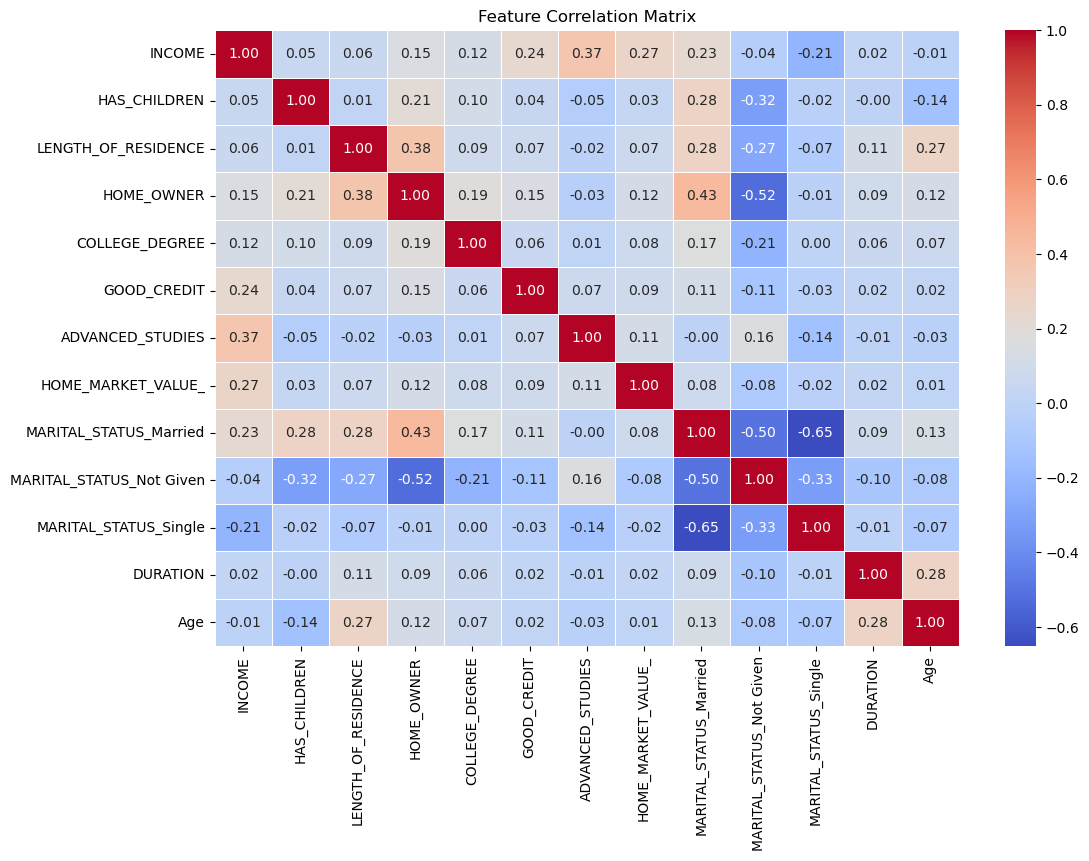

In [171]:
# Before building a model let's first understand which features to use
correlation_matrix = df[features.columns].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Feature Correlation Matrix')
plt.show()


Given that there are not strong correlations between any pair of features. At this point I will use Recursive Feature Elimination which will remove the least important features based on the weights assigned by a model like linear regression.


In [172]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [173]:
# Define features and target variables 
y = df[['CURR_ANN_AMT_CAR', 'CURR_ANN_AMT_HEALTH', 'CURR_ANN_AMT_HOUSE']].sum(axis=1)
X = df[["INCOME", "HAS_CHILDREN", "LENGTH_OF_RESIDENCE", "HOME_OWNER", "COLLEGE_DEGREE", "GOOD_CREDIT", 
        "ADVANCED_STUDIES", "HOME_MARKET_VALUE_", "MARITAL_STATUS_Married", "MARITAL_STATUS_Not Given", 
        "MARITAL_STATUS_Single", "DURATION", "Age"]]

In [174]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

In [175]:
# Initialize a linear regression model
model = LinearRegression()

# Initialize RFE with the linear regression model and a specified number of features to select
rfe = RFE(estimator=model, n_features_to_select=8)

# Fit RFE
rfe.fit(X_train, y_train)

# Get the mask of selected features
selected_features = rfe.support_

# Print out the selected features
print(f'Selected features: {X_train.columns[selected_features]}')

Selected features: Index(['HAS_CHILDREN', 'HOME_OWNER', 'COLLEGE_DEGREE', 'GOOD_CREDIT',
       'ADVANCED_STUDIES', 'MARITAL_STATUS_Married',
       'MARITAL_STATUS_Not Given', 'MARITAL_STATUS_Single'],
      dtype='object')


In [176]:
# Select the features from X_train and X_test
X_train_selected = X_train.loc[:, selected_features]
X_test_selected = X_test.loc[:, selected_features]

# Train the model using only the selected features
model.fit(X_train_selected, y_train)

# Predict on the test set using only the selected features
y_pred = model.predict(X_test_selected)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse = mean_squared_error(y_test, y_pred, squared=True)

# Print out the RMSE and MSE
print(f'The model MSE is: {mse}')


The model MSE is: 191707.2263714769


RFE is not helping at decreasing the error. What I noticed is that as increase the number of features the MSE decreases. This suggests that some of the features eliminated are likely providing important information that helps the model make more accurate predictions

In [195]:
# Let's build the model with all the features to see that the error decreases 

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model using RMSE
mse = mean_squared_error(y_test, y_pred, squared=True)

# Print the RMSE
print(f'The model MSE is: {mse}')


The model MSE is: 187177.72021723818


#### Q2.2 Build a second model to estimate the costumer value based on their characteristics and compare model performance. (10 points)

I will try to use L1 regularization which shrink some of the less important feature weights to exactly zero, effectively performing feature selection and resulting in a model with fewer nonzero feature weights.

In [193]:
from sklearn.linear_model import Lasso

y = df[['CURR_ANN_AMT_CAR', 'CURR_ANN_AMT_HEALTH', 'CURR_ANN_AMT_HOUSE']].sum(axis=1)
X = df[["INCOME", "HAS_CHILDREN", "LENGTH_OF_RESIDENCE", "HOME_OWNER", "COLLEGE_DEGREE", "GOOD_CREDIT", 
        "ADVANCED_STUDIES", "HOME_MARKET_VALUE_", "MARITAL_STATUS_Married", "MARITAL_STATUS_Not Given", 
        "MARITAL_STATUS_Single", "DURATION", "Age"]]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

# Assuming X_train, X_test, y_train, y_test are already defined
# Initialize the Lasso Regression model with an alpha value
lasso_model = Lasso(alpha=1.0)

# Train the model
lasso_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)

# Print out the MSE and RMSE
print(f'The Lasso model MSE is: {mse_lasso}')
print(f'The Lasso model RMSE is: {rmse_lasso}')


The Lasso model MSE is: 187229.85650096135
The Lasso model RMSE is: 432.70065461120043


#### Q2.3 Based on the analysis, suggest a model to the head of marketing and an application scenario. Please justify your decisions. (10 points)

Both models have relativelz high errors with RMSE of approximatelz 430. The basline model slightly outperforms the Lasso model. The suggestion to the head of marketing would be to devise new data collection strategies in order to collect new features. It is paramount to ensure better data quality, as partial reason for the perfromance of the model is the bad data quality. Once the new data is collected a model should be fit using the baseline model as it outperformed the lasso. Then the data can be used to predict customer liftetime value and help identify key customers that should be kept at all cost.

## Question 3: Churn Analysis and Prevention Strategy (35 points)

#### Background: Customer retention is a significant concern for ABC Insurance. The df_termination dataset indicates customers who have recently suspended their policies, providing a basis for analyzing churn.

#### Q3.1 Build a baseline model to predict customers that will churn. (15 points)

In [183]:
columns = [
    "Age", "INCOME", "HAS_CHILDREN", "LENGTH_OF_RESIDENCE", "HOME_OWNER",
    "COLLEGE_DEGREE", "GOOD_CREDIT", "ADVANCED_STUDIES", "HOME_MARKET_VALUE_",
    "MARITAL_STATUS_Married", "MARITAL_STATUS_Not Given", "MARITAL_STATUS_Single",
    "DURATION", "CHURN_INDICATOR"
]

# Selecting only the specified columns from the DataFrame
df_selected = df[columns]

# Calculating correlation matrix
correlation_matrix = df_selected.corr()

# Extracting the correlation values with CHURN_INDICATOR
correlation_with_churn = correlation_matrix["CHURN_INDICATOR"].sort_values(ascending=False)

# Displaying the correlation values
print(correlation_with_churn)

CHURN_INDICATOR             1.000000
HAS_CHILDREN                0.007657
MARITAL_STATUS_Not Given    0.003173
MARITAL_STATUS_Married      0.000276
ADVANCED_STUDIES           -0.000521
HOME_MARKET_VALUE_         -0.003048
MARITAL_STATUS_Single      -0.003083
INCOME                     -0.003552
GOOD_CREDIT                -0.004836
HOME_OWNER                 -0.005279
Age                        -0.010613
COLLEGE_DEGREE             -0.010789
LENGTH_OF_RESIDENCE        -0.017081
DURATION                   -0.153120
Name: CHURN_INDICATOR, dtype: float64


In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import f1_score

# Example: Convert a datetime column to the year
df['CHURN_INDICATOR'] = df['CHURN_INDICATOR'].astype(int)

# Assuming 'df' is your DataFrame with a 'Churn' column as the target variable
X = df[["HAS_CHILDREN", "MARITAL_STATUS_Not Given", "MARITAL_STATUS_Married", "LENGTH_OF_RESIDENCE", "COLLEGE_DEGREE","DURATION","HOME_OWNER"]]  # Features
y = df['CHURN_INDICATOR']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'The model F1 Score is: {f1}')



Accuracy: 0.9160396847036052
The model F1 Score is: 0.0


#### Q3.2 Build a second model and compare the model performance. (15 points)

In [191]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
f1 = f1_score(y_test, y_pred)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f'The model F1 Score is: {f1}')
print(f'Accuracy: {accuracy_rf}')


The model F1 Score is: 0.0
Accuracy: 0.9279627814663886


#### Q3.3 Based on the analysis, suggest a model to the head of marketing and an application scenario. Please justify your decisions. (10 points)

Both models have a very high accuracy but f1 score of zero which means neither model is good. The goal of the classifier is to successfully predict customers who churn. Both models failed to predict any customers to churn. This is because the dataset is highly inbalanced. 